In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import json
from datetime import datetime
from pathlib import Path
from random import randint

from dotenv import dotenv_values, load_dotenv

from flux.api import ImageRequest

In [33]:
load_dotenv()

True

In [34]:
if "PROJECT_ROOT" not in globals():
    PROJECT_ROOT = Path.cwd()

display(PROJECT_ROOT)

PosixPath('/usr/local/src/dev/personal/flux')

In [35]:
date_str = datetime.now().strftime("%Y-%m-%d")

In [36]:
OUTPUT_DIR = PROJECT_ROOT / "output" / date_str
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
OUTPUT_DIR

PosixPath('/usr/local/src/dev/personal/flux/output/2024-10-06')

In [37]:
IMAGE_OUTPUT_DIR = OUTPUT_DIR / "images"
JSON_OUTPUT_DIR = OUTPUT_DIR / "json"

In [38]:
seed = randint(0, 100000)
# seed = 2

In [39]:
image_config = {
    "prompt": "Create a minimalist artistic line drawing on parchment. A golden thin line forms a cat ascending a slope from lower right to upper left. The cat is mid-stride, its body angled upward, but its head is turned sharply back, creating a dynamic contrast. The slope is represented by a single black diagonal line. The cat's pose, the slope's angle, and the right edge of the image form an elegant triangle. Use clean, high-resolution linework to emphasize the fluid motion and geometric harmony. The overall composition should convey curiosity and movement through simple, elegant lines, balancing forward momentum with the cat's backward glance.",
    "name": "flux.1.1-pro",
    "seed": seed,
    "prompt_upsampling": True,
    "safety_tolerance": 2,
}

In [40]:
request = ImageRequest(**image_config, api_key=dotenv_values()["bfl_api_key"])


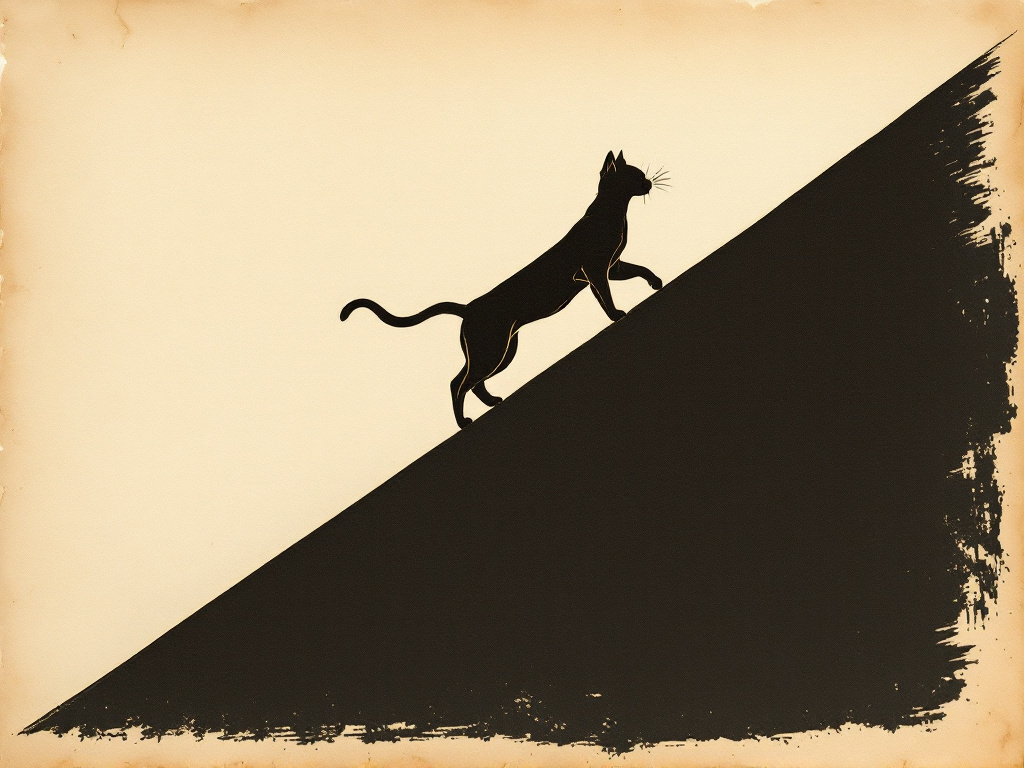

In [41]:
request.image

In [42]:
request.url


'https://bflapistorage.blob.core.windows.net/public/dd6b057811934ac2b1b58f979f5b333f/sample.jpg'

In [43]:
next_image_idx = len(tuple(IMAGE_OUTPUT_DIR.glob("*.jpg"))) + 1
filename_base = f"{date_str}_{next_image_idx:03}"
filename_base

'2024-10-06_058'

In [44]:
request.save(str(IMAGE_OUTPUT_DIR / f"{filename_base}.jpg"))


In [45]:
json_str = json.dumps(
    {
        "name": request.name,
        "request": request.request_json,
        "image_url": request.url,
    },
    indent=2,
)

JSON_OUTPUT_DIR.mkdir(exist_ok=True, parents=True)
with open(JSON_OUTPUT_DIR / f"{filename_base}.json", "w") as f:
    f.write(json_str)

print(json_str)

{
  "name": "flux.1.1-pro",
  "request": {
    "prompt": "Create a minimalist artistic line drawing on parchment. A golden thin line forms a cat ascending a slope from lower right to upper left. The cat is mid-stride, its body angled upward, but its head is turned sharply back, creating a dynamic contrast. The slope is represented by a single black diagonal line. The cat's pose, the slope's angle, and the right edge of the image form an elegant triangle. Use clean, high-resolution linework to emphasize the fluid motion and geometric harmony. The overall composition should convey curiosity and movement through simple, elegant lines, balancing forward momentum with the cat's backward glance.",
    "prompt_upsampling": true,
    "seed": 29463,
    "safety_tolerance": 2
  },
  "image_url": "https://bflapistorage.blob.core.windows.net/public/dd6b057811934ac2b1b58f979f5b333f/sample.jpg"
}
